In [55]:
import uproot
import awkward as ak
import numpy as np
import math
import hist
import matplotlib.pyplot as plt
import os
import subprocess
import vector
import gc
import pandas as pd
from scipy.optimize import curve_fit

In [56]:
l1 = []
l2 = []

l1 = pd.read_csv("../data/counters.offline.csv")["run"]
l2 = [int(e) for e in os.popen("ls /pbs/throng/training/nantes-m2-rps-exp/data/ | grep 'mc' | cut -c 4-9").read().split("\n")[0:-2]]
#list(set(l1) & set(l2))

BASEDIR = "/pbs/throng/training/nantes-m2-rps-exp/data"
DATATYPE = ["mc", "mc", "data"]
TREE = ["gen", "events", "events"]

l3 = []
for l in l2:
    for batch in uproot.iterate(f"/pbs/throng/training/nantes-m2-rps-exp/data/run{l}.mc.root:genTree",                                
                                report = True):

        events = batch[0]
        if len(events) < 1000:
            #print("something is wrong", batch[1])
            break
            
        l3 = np.append(l3, l)
        
_ = list(set(l1) & set(l2) & set(l3))

SAMPLE_RUNS = [int(run) for run in _]

SAMPlE_RUNS = SAMPLE_RUNS.sort()
print(SAMPLE_RUNS)

[290323, 290327, 290374, 290375, 290404, 290423, 290425, 290427, 290456, 290458, 290459, 290469, 290501, 290539, 290540, 290549, 290553, 290590, 290612, 290632, 290658, 290660, 290687, 290692, 290696, 290699, 290742, 290764, 290766, 290776, 290787, 290848, 290853, 290860, 290894, 290895, 290932, 290935, 290975, 290980, 291002, 291003, 291004, 291005, 291041, 291263, 291283, 291284, 291285, 291360, 291361, 291362, 291373, 291399, 291400, 291447, 291451, 291453, 291482, 291485, 291590, 291618, 291622, 291624, 291657, 291690, 291692, 291694, 291698, 291706, 291755, 291760, 291769, 291795, 291796, 291803, 291943, 291944, 291948, 291953, 291976, 291982, 292012, 292040, 292060, 292061, 292062, 292075, 292077, 292080, 292106, 292108, 292109, 292115, 292140, 292160, 292162, 292163, 292164, 292166, 292168, 292192, 292242, 292265, 292269, 292270, 292273, 292274]


In [57]:
on =  pd.read_csv('../data/counters.online.csv')
off = pd.read_csv('../data/counters.offline.csv')

In [58]:
#----------METHODE ONLINE----------

cint7l0b = np.array([], dtype=float)
cmul7l0b = np.array([], dtype=float)
duration = np.array([], dtype=float) 
int_bunches = np.array([], dtype=float)
F_NORM_online = np.array([], dtype=float)
N_MB_online = np.array([], dtype=float)


for i in SAMPLE_RUNS: 
    ligne_cible_on = on.loc[on["run"] == i]
    
    cint7l0b = np.append(cint7l0b, ligne_cible_on["cint7l0b"].values[0])
    cmul7l0b = np.append(cmul7l0b, ligne_cible_on["cmul7l0b"].values[0])
    duration = np.append(duration, ligne_cible_on["duration(s)"].values[0])
    int_bunches = np.append(int_bunches, ligne_cible_on["interacting_bunches"].values[0])
    F_NORM_online = np.append(F_NORM_online, ligne_cible_on["cint7l0b"].values[0]/ligne_cible_on["cmul7l0b"].values[0])

for i in range(len(F_NORM_online)):
    N_MB_online = np.append(N_MB_online, F_NORM_online[i]*cmul7l0b[i])

In [59]:
#----------METHODE OFFLINE----------

#----Données ALL---- : 

cint7all = np.array([], dtype=float)
cmul7all = np.array([], dtype=float)
cmsl7all = np.array([], dtype=float)
cmsl7all0mul = np.array([], dtype=float)
cint7all0msl = np.array([], dtype=float)
F_NORM_offline_all = np.array([], dtype=float)
N_MB_offline_all = np.array([], dtype=float)

for i in SAMPLE_RUNS: 
    ligne_cible_off = off.loc[off["run"] == i]
    cint7all = np.append(cint7all, ligne_cible_off["cint7all"].values[0])
    cmul7all = np.append(cmul7all, ligne_cible_off["cmul7all"].values[0])
    cmsl7all = np.append(cmsl7all, ligne_cible_off["cmsl7all"].values[0])
    cmsl7all0mul = np.append(cmsl7all0mul, ligne_cible_off["cmsl7all&0mul"].values[0])
    cint7all0msl = np.append(cint7all0msl, ligne_cible_off["cint7all&0msl"].values[0])
    F_NORM_offline_all = np.append(F_NORM_offline_all, (ligne_cible_off["cmsl7all"].values[0]/ligne_cible_off["cmsl7all&0mul"].values[0])*
                                  (ligne_cible_off["cint7all"].values[0]/ligne_cible_off["cint7all&0msl"].values[0]))
                                  
for i in range(len(F_NORM_offline_all)):
    N_MB_offline_all = np.append(N_MB_offline_all, F_NORM_offline_all[i]*cmul7all[i])

#print(cmul7all)
#print(F_NORM_offline_all)

In [60]:
#----------METHODE OFFLINE----------

#----Données PS---- : 

cint7ps = np.array([], dtype=float)
cmul7ps = np.array([], dtype=float)
cmsl7ps = np.array([], dtype=float)
F_NORM_offline_ps = np.array([], dtype=float)
N_MB_offline_ps = np.array([], dtype=float)

for i in SAMPLE_RUNS: 
    ligne_cible_off = off.loc[off["run"] == i]
    cint7ps = np.append(cint7ps, ligne_cible_off["cint7ps"].values[0])
    cmul7ps = np.append(cmul7ps, ligne_cible_off["cmul7ps"].values[0])
    cmsl7ps = np.append(cmsl7ps, ligne_cible_off["cmsl7ps"].values[0])
    F_NORM_offline_ps = np.append(F_NORM_offline_ps, (ligne_cible_off["cmsl7ps"].values[0]/ligne_cible_off["cmsl7all&0mul"].values[0])*
                                  (ligne_cible_off["cint7ps"].values[0]/ligne_cible_off["cint7all&0msl"].values[0]))
                                  
for i in range(len(F_NORM_offline_ps)):
    N_MB_offline_ps = np.append(N_MB_offline_ps, F_NORM_offline_ps[i]*cmul7ps[i])

#print(F_NORM_offline_ps)

In [61]:
######################################################################
########################### CALCUL MOYENNE ###########################
######################################################################

#--------- METHODE ONLINE ---------#

#0- Pas de pondération

moy_N_MB_simple_on = np.sum(N_MB_online)/len(N_MB_online)


#1- CINT

N_MBxcint7l0b_on = np.array([], dtype=float)
for i in range(len(N_MB_online)):
    N_MBxcint7l0b_on = np.append(N_MBxcint7l0b_on, N_MB_online[i]*cint7l0b[i])

moy_N_MB_cint7l0b_on = np.sum(N_MBxcint7l0b_on)/np.sum(cint7l0b)


#2- CMUL 

N_MBxcmul7l0b_on = np.array([], dtype=float)
for i in range(len(N_MB_online)):
    N_MBxcmul7l0b_on = np.append(N_MBxcmul7l0b_on, N_MB_online[i]*cmul7l0b[i])

moy_N_MB_cmul7l0b_on = np.sum(N_MBxcmul7l0b_on)/np.sum(cmul7l0b)


#3- Duration

N_MBxduration_on = np.array([], dtype=float)
for i in range(len(N_MB_online)):
    N_MBxduration_on = np.append(N_MBxduration_on, N_MB_online[i]*duration[i])

moy_N_MB_duration_on = np.sum(N_MBxduration_on)/np.sum(duration)




#--------- METHODE OFFLINE ALL ---------#

#0- Pas de pondération

moy_N_MB_simple_off_all = np.sum(N_MB_offline_all)/len(N_MB_offline_all)


#1- CINT ALL

N_MBxcint7all_off = np.array([], dtype=float)
for i in range(len(N_MB_offline_all)):
    N_MBxcint7all_off = np.append(N_MBxcint7all_off, N_MB_offline_all[i]*cint7all[i])

moy_N_MB_cint7all = np.sum(N_MBxcint7all_off)/np.sum(cint7all)


#2- CMUL ALL

N_MBxcmul7all_off = np.array([], dtype=float)
for i in range(len(N_MB_offline_all)):
    N_MBxcmul7all_off = np.append(N_MBxcmul7all_off, N_MB_offline_all[i]*cmul7all[i])

moy_N_MB_cmul7all = np.sum(N_MBxcmul7all_off)/np.sum(cmul7all)

#print(N_MBxcmul7all_off)

#3- CMSL ALL

N_MBxcmsl7all_off = np.array([], dtype=float)
for i in range(len(N_MB_offline_all)):
    N_MBxcmsl7all_off = np.append(N_MBxcmsl7all_off, N_MB_offline_all[i]*cmsl7all[i])

moy_N_MB_cmsl7all = np.sum(N_MBxcmsl7all_off)/np.sum(cmsl7all)


#4- Duration

N_MBxduration_off_all = np.array([], dtype=float)
for i in range(len(N_MB_offline_all)):
    N_MBxduration_off_all = np.append(N_MBxduration_off_all, N_MB_offline_all[i]*duration[i])

moy_N_MB_duration_off_all = np.sum(N_MBxduration_off_all)/np.sum(duration)




#--------- METHODE OFFLINE PS ---------#

#0- Pas de pondération

moy_N_MB_simple_off_ps = np.sum(N_MB_offline_ps)/len(N_MB_offline_ps)


#1- CINT PS

N_MBxcint7ps_off = np.array([], dtype=float)
for i in range(len(N_MB_offline_ps)):
    N_MBxcint7ps_off = np.append(N_MBxcint7ps_off, N_MB_offline_ps[i]*cint7ps[i])

moy_N_MB_cint7ps = np.sum(N_MBxcint7ps_off)/np.sum(cint7ps)


#2- CMUL PS

N_MBxcmul7ps_off = np.array([], dtype=float)
for i in range(len(N_MB_offline_ps)):
    N_MBxcmul7ps_off = np.append(N_MBxcmul7ps_off, N_MB_offline_ps[i]*cmul7ps[i])

moy_N_MB_cmul7ps = np.sum(N_MBxcmul7ps_off)/np.sum(cmul7ps)


#3- CMSL PS

N_MBxcmsl7ps_off = np.array([], dtype=float)
for i in range(len(N_MB_offline_ps)):
    N_MBxcmsl7ps_off = np.append(N_MBxcmsl7ps_off, N_MB_offline_ps[i]*cmsl7ps[i])

moy_N_MB_cmsl7ps = np.sum(N_MBxcmsl7ps_off)/np.sum(cmsl7ps)


#4- Duration

N_MBxduration_off_ps = np.array([], dtype=float)
for i in range(len(N_MB_offline_ps)):
    N_MBxduration_off_ps = np.append(N_MBxduration_off_ps, N_MB_offline_ps[i]*duration[i])

moy_N_MB_duration_off_ps = np.sum(N_MBxduration_off_ps)/np.sum(duration)

In [62]:
print("Valeur des différentes moyennes de N_MB_on (méthode online seulement) : \n",
      "\n moyenne non pondéré de N_MB_on                  :", moy_N_MB_simple_on, "+", (np.sqrt(moy_N_MB_simple_on)/moy_N_MB_simple_on)*100,"%",
      "\n moyenne pondéré de N_MB_on par cint7l0b         :", moy_N_MB_cint7l0b_on, "+", (np.sqrt(moy_N_MB_cint7l0b_on)/moy_N_MB_cint7l0b_on)*100,"%",
      "\n moyenne pondéré de N_MB_on par cmul7l0b         :", moy_N_MB_cmul7l0b_on, " +", (np.sqrt(moy_N_MB_cmul7l0b_on)/moy_N_MB_cmul7l0b_on)*100,"%",
      "\n moyenne pondéré de N_MB_on par duration(s)      :", moy_N_MB_duration_on, "+", (np.sqrt(moy_N_MB_duration_on)/moy_N_MB_duration_on)*100, "%", "\n \n")

print("Valeur des différentes moyennes de N_MB_off_all (méthode offline all + duration) : \n",
      "\n moyenne non pondéré de N_MB_off_all             :", moy_N_MB_simple_off_all, " +", (np.sqrt(moy_N_MB_simple_off_all)/moy_N_MB_simple_off_all)*100,"%",
      "\n moyenne pondéré de N_MB_off_all par cint7all    :", moy_N_MB_cint7all, "+", (np.sqrt(moy_N_MB_cint7all)/moy_N_MB_cint7all)*100,"%",
      "\n moyenne pondéré de N_MB_off_all par cmul7all    :", moy_N_MB_cmul7all, "+", (np.sqrt(moy_N_MB_cmul7all)/moy_N_MB_cmul7all)*100,"%",
      "\n moyenne pondéré de N_MB_off_all par cmsl7all    :", moy_N_MB_cmsl7all, "+", (np.sqrt(moy_N_MB_cmsl7all)/moy_N_MB_cmsl7all)*100,"%",
      "\n moyenne pondéré de N_MB_off_all par duration(s) :", moy_N_MB_duration_off_all, "+", (np.sqrt(moy_N_MB_duration_off_all)/moy_N_MB_duration_off_all)*100,"%", "\n \n")

print("Valeur des différentes moyennes de N_MB_off_ps (méthode offline ps + duration) : \n",
      "\n moyenne non pondéré de N_MB_off_ps             :", moy_N_MB_simple_off_ps, "  +", (np.sqrt(moy_N_MB_simple_off_ps)/moy_N_MB_simple_off_ps)*100,"%",
      "\n moyenne pondéré de N_MB_off_ps par cint7ps     :", moy_N_MB_cint7ps, " +", (np.sqrt(moy_N_MB_cint7ps)/moy_N_MB_cint7ps)*100,"%",
      "\n moyenne pondéré de N_MB_off_ps par cmul7ps     :", moy_N_MB_cmul7ps, "+", (np.sqrt(moy_N_MB_cint7ps)/moy_N_MB_cint7ps)*100,"%",
      "\n moyenne pondéré de N_MB_off_ps par cmsl7ps     :", moy_N_MB_cmsl7ps, "+", (np.sqrt(moy_N_MB_cint7ps)/moy_N_MB_cint7ps)*100,"%",
      "\n moyenne pondéré de N_MB_off_ps par duration(s) :", moy_N_MB_duration_off_ps,"+", (np.sqrt(moy_N_MB_duration_off_ps)/moy_N_MB_duration_off_ps)*100,"%")

Valeur des différentes moyennes de N_MB_on (méthode online seulement) : 
 
 moyenne non pondéré de N_MB_on                  : 1324905626.4074075 + 0.0027473091197467866 % 
 moyenne pondéré de N_MB_on par cint7l0b         : 1934985968.1328604 + 0.0022733227075424126 % 
 moyenne pondéré de N_MB_on par cmul7l0b         : 1935292845.639323  + 0.0022731424611101138 % 
 moyenne pondéré de N_MB_on par duration(s)      : 1933736135.3153353 + 0.0022740572478761913 % 
 

Valeur des différentes moyennes de N_MB_off_all (méthode offline all + duration) : 
 
 moyenne non pondéré de N_MB_off_all             : 875983449.6055784  + 0.003378718809459222 % 
 moyenne pondéré de N_MB_off_all par cint7all    : 1264644389.5275524 + 0.0028120030614765916 % 
 moyenne pondéré de N_MB_off_all par cmul7all    : 1267719114.3846369 + 0.0028085908763312278 % 
 moyenne pondéré de N_MB_off_all par cmsl7all    : 1268380936.4401455 + 0.0028078580405290895 % 
 moyenne pondéré de N_MB_off_all par duration(s) : 1262725226

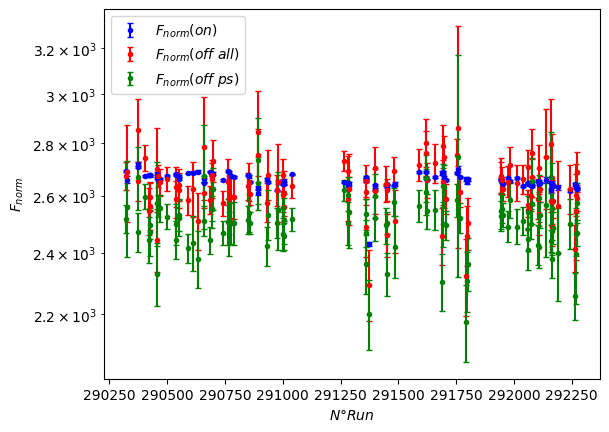

In [77]:
#################################################################
########################### GRAPHIQUE ###########################
#################################################################


#--------- METHODE ONLINE ---------#
'''fig_on = plt.figure()
plt.errorbar(cmul7l0b, N_MBxcint7l0b_on, yerr = np.sqrt(N_MBxcint7l0b_on), marker = 'o', label='cint7l0b', color='red', linestyle = 'none')
plt.errorbar(cmul7l0b, N_MBxcmul7l0b_on, yerr = np.sqrt(N_MBxcmul7l0b_on), marker = 'o', label='cmul7l0b', color='blue', linestyle = 'none')
plt.errorbar(cmul7l0b, N_MBxduration_on, yerr = np.sqrt(N_MBxduration_on), marker = 'o', label='cint7l0b', color='orange', linestyle = 'none')
plt.xscale("log")
plt.yscale("log")
plt.legend()

#--------- METHODE OFFLINE ALL ---------#

fig_off_all = plt.figure()
plt.errorbar(cmul7all, N_MBxcint7all_off, yerr = np.sqrt(N_MBxcint7all_off), marker = 'o', label='cint7all', color='red', linestyle = 'none')
plt.errorbar(cmul7all, N_MBxcmul7all_off, yerr = np.sqrt(N_MBxcmul7all_off), marker = 'o', label='cmul7all', color='blue', linestyle = 'none')
plt.errorbar(cmul7all, N_MBxcmsl7all_off, yerr = np.sqrt(N_MBxcmsl7all_off), marker = 'o', label='cmsl7all', color='green', linestyle = 'none')
plt.errorbar(cmul7all, N_MBxduration_off_all, yerr = np.sqrt(N_MBxduration_off_all), marker = 'o', label='duration', color='orange', linestyle = 'none')
plt.xscale("log")
plt.yscale("log")
plt.legend()

#--------- METHODE OFFLINE PS ---------#

fig_off_ps = plt.figure()
plt.errorbar(cmul7ps, N_MBxcint7ps_off, yerr = np.sqrt(N_MBxcint7ps_off), marker = 'o', label='cint7ps', color='red', linestyle = 'none')
plt.errorbar(cmul7ps, N_MBxcmul7ps_off, yerr = np.sqrt(N_MBxcmul7ps_off), marker = 'o', label='cmul7ps', color='blue', linestyle = 'none')
plt.errorbar(cmul7ps, N_MBxcmsl7ps_off, yerr = np.sqrt(N_MBxcmsl7ps_off), marker = 'o', label='cmsl7ps', color='green', linestyle = 'none')
plt.errorbar(cmul7ps, N_MBxduration_off_ps, yerr = np.sqrt(N_MBxduration_off_ps), marker = 'o', label='duration', color='orange', linestyle = 'none')
plt.xscale("log")
plt.yscale("log")
plt.legend()'''

#--------- F NORM---------#

err_F_NORM_online = np.array([], dtype=float)
for i in range(len(cint7l0b)):
    err_F_NORM_online = np.append(err_F_NORM_online, (cmul7l0b[i]*np.sqrt(cint7l0b[i])+cint7l0b[i]*np.sqrt(cmul7l0b[i]))/cmul7l0b[i]**2)

err_F_NORM_offline_all = np.array([], dtype=float)
for i in range(len(F_NORM_offline_all)):
    err_F_NORM_offline_all = np.append(err_F_NORM_offline_all, F_NORM_offline_all[i] * np.sqrt( (np.sqrt(cmsl7all0mul[i])/cmsl7all0mul[i])**2 + (np.sqrt(cmsl7all[i])/cmsl7all[i])**2 
                                                                                              + (np.sqrt(cint7all[i])/cint7all[i])**2 + (np.sqrt(cint7all0msl[i])/cint7all0msl[i])**2 ) )

err_F_NORM_offline_ps = np.array([], dtype=float)
for i in range(len(F_NORM_offline_ps)):
    err_F_NORM_offline_ps = np.append(err_F_NORM_offline_ps, F_NORM_offline_ps[i] * np.sqrt( (np.sqrt(cmsl7all0mul[i])/cmsl7all0mul[i])**2 + (np.sqrt(cmsl7ps[i])/cmsl7ps[i])**2 
                                                                                              + (np.sqrt(cint7ps[i])/cint7ps[i])**2 + (np.sqrt(cint7all0msl[i])/cint7all0msl[i])**2 ) )

    
fig_f_norm = plt.figure()
plt.errorbar(SAMPLE_RUNS, F_NORM_online, yerr = err_F_NORM_online, marker = '.', label=r'$F_{norm} (on)$', color='blue', linestyle = 'none', capsize = 2)
plt.errorbar(SAMPLE_RUNS, F_NORM_offline_all, yerr = err_F_NORM_offline_all, marker = '.', label=r'$F_{norm} (off~all)$', color='red', linestyle = 'none', capsize = 2)
plt.errorbar(SAMPLE_RUNS, F_NORM_offline_ps, yerr = err_F_NORM_offline_ps , marker = '.', label=r'$F_{norm} (off~ps)$', color='green', linestyle = 'none', capsize = 2 )
plt.yscale("log")
plt.ylabel(r"$F_{norm}$")
plt.xlabel(r"$N° Run$")
plt.legend()


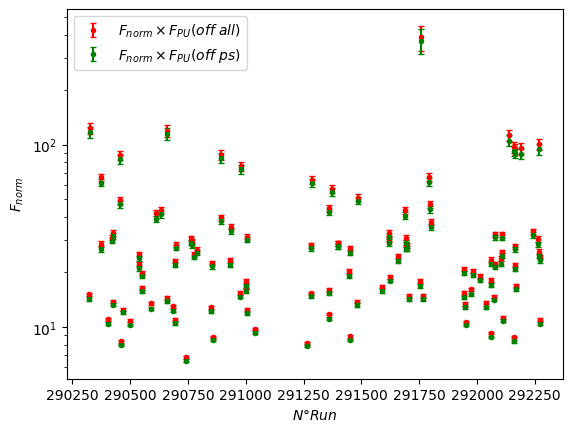

In [79]:
#--------- F PILL UP ---------#
f_LHC = 11245

L0b = np.array([], dtype=float)
for i in range(len(cint7l0b)):
    L0b = np.append(L0b, cint7l0b[i]/duration[i])

#Calcul de mu 

mu = np.array([], dtype=float)
F_PU = np.array([], dtype=float)
for i in range(len(cint7l0b)):
    mu = np.append(mu, -np.log((cint7ps[i]*L0b[i])/(int_bunches[i]*f_LHC)))
    F_PU = np.append(F_PU, mu[i]/(1-np.exp(-mu[i])))

#print(F_PU)

err_F_NORM_offline_all_PU = np.array([], dtype=float)
err_F_NORM_offline_ps_PU = np.array([], dtype=float)
for i in range(len(F_NORM_offline_all)):
    delta_mu = 1/np.exp(-mu[i])*np.sqrt( (L0b[i]*np.sqrt(cint7ps[i])/(int_bunches[i]*f_LHC))**2 + (cint7ps[i]*np.sqrt(L0b[i])/(int_bunches[i]*f_LHC))**2 + (cint7ps[i]*L0b[i]*np.sqrt(int_bunches[i])/((int_bunches[i])**2*f_LHC))**2 )
    delta_expmu = 1/np.exp(-mu[i])*np.sqrt(1/cint7ps[i] + 1/int_bunches[i] + 1/L0b[i])
    err_F_NORM_offline_all_PU = np.append(err_F_NORM_offline_all_PU, F_NORM_offline_all[i]*F_PU[i]*np.sqrt(1/cmsl7all[i] + 1/cmsl7all0mul[i] + 1/cint7all[i] + 1/cint7all0msl[i] + (delta_mu/mu[i])**2 ) + (delta_expmu/(1-np.exp(-mu[i])))**2 )
    err_F_NORM_offline_ps_PU = np.append(err_F_NORM_offline_ps_PU, F_NORM_offline_ps[i]*F_PU[i]*np.sqrt(1/cmsl7ps[i] + 1/cmsl7all0mul[i] + 1/cint7ps[i] + 1/cint7all0msl[i] + (delta_mu/mu[i])**2 ) + (delta_expmu/(1-np.exp(-mu[i])))**2 )
    

fig_f_norm_PU = plt.figure()
#plt.errorbar(SAMPLE_RUNS, F_NORM_online, yerr = err_F_NORM_online, marker = '.', label=r'$F_{norm} (on)$', color='blue', linestyle = 'none', capsize = 2)
plt.errorbar(SAMPLE_RUNS, np.multiply(F_NORM_offline_all, F_PU) , yerr = err_F_NORM_offline_all_PU, marker = '.', label=r'$F_{norm} \times F_{PU} (off~all)$', color='red', linestyle = 'none', capsize = 2)
plt.errorbar(SAMPLE_RUNS, np.multiply(F_NORM_offline_ps, F_PU) , yerr = err_F_NORM_offline_ps_PU , marker = '.', label=r'$F_{norm} \times F_{PU} (off~ps)$', color='green', linestyle = 'none', capsize = 2 )
plt.yscale("log")
plt.ylabel(r"$F_{norm}$")
plt.xlabel(r"$N° Run$")
plt.legend()

2656.375608821579
2657.3740270081757
2657.1992508801322
2657.601404230251
2631.1127074338087
2634.769636668783
2634.210036761592
2634.3334393754826
2635.487412576111
2505.643624163602
2511.3045993743394
2510.9298990627726
2511.10855873716
2512.150904035046


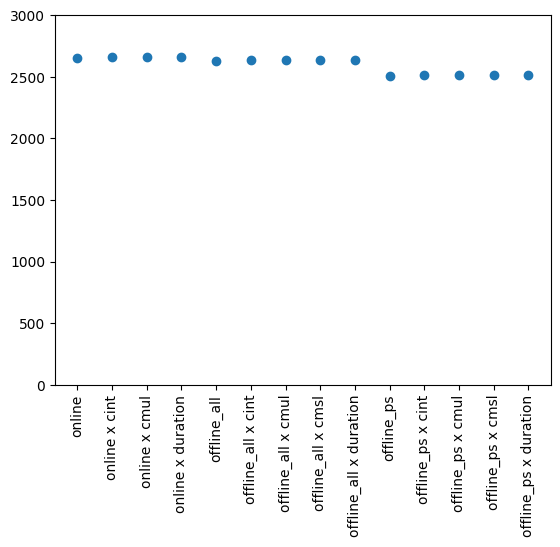

In [130]:
#################################################################
################### F NORM PONDERATION ##########################
#################################################################


moyenne_F_NORM = []
#--------------- ONLINE (sans PU) ---------------#


#1) PAS DE PONDERATION

moy_F_NORM_on = np.sum(F_NORM_online)/len(F_NORM_online)
moyenne_F_NORM.append(moy_F_NORM_on)


#2) CINT

F_NORM_onxcint7l0b = np.array([], dtype=float)
for i in range(len(F_NORM_online)):
    F_NORM_onxcint7l0b = np.append(F_NORM_onxcint7l0b, F_NORM_online[i]*cint7l0b[i])

moy_F_NORM_on_cint7l0b = np.sum(F_NORM_onxcint7l0b)/np.sum(cint7l0b)
moyenne_F_NORM.append(moy_F_NORM_on_cint7l0b)


#3) CMUL

F_NORM_onxcmul7l0b = np.array([], dtype=float)
for i in range(len(F_NORM_online)):
    F_NORM_onxcmul7l0b = np.append(F_NORM_onxcmul7l0b, F_NORM_online[i]*cmul7l0b[i])

moy_F_NORM_on_cmul7l0b = np.sum(F_NORM_onxcmul7l0b)/np.sum(cmul7l0b)
moyenne_F_NORM.append(moy_F_NORM_on_cmul7l0b)


#4) DURATION 

F_NORM_onxduration = np.array([], dtype=float)
for i in range(len(F_NORM_online)):
    F_NORM_onxduration = np.append(F_NORM_onxduration, F_NORM_online[i]*duration[i])

moy_F_NORM_on_duration = np.sum(F_NORM_onxduration)/np.sum(duration)
moyenne_F_NORM.append(moy_F_NORM_on_duration)


#--------------- OFFLINE ALL (sans PU) ---------------#

#1) PAS DE PONDERATION

moy_F_NORM_off_all = np.sum(F_NORM_offline_all)/len(F_NORM_offline_all)
moyenne_F_NORM.append(moy_F_NORM_off_all)


#2) CINT

F_NORM_off_allxcint7all = np.array([], dtype=float)
for i in range(len(F_NORM_offline_all)):
    F_NORM_off_allxcint7all = np.append(F_NORM_off_allxcint7all, F_NORM_offline_all[i]*cint7all[i])

moy_F_NORM_off_all_cint7all = np.sum(F_NORM_off_allxcint7all)/np.sum(cint7all)
moyenne_F_NORM.append(moy_F_NORM_off_all_cint7all)


#3) CMUL

F_NORM_off_allxcmul7all = np.array([], dtype=float)
for i in range(len(F_NORM_offline_all)):
    F_NORM_off_allxcmul7all = np.append(F_NORM_off_allxcmul7all, F_NORM_offline_all[i]*cmul7all[i])

moy_F_NORM_off_all_cmul7all = np.sum(F_NORM_off_allxcmul7all)/np.sum(cmul7all)
moyenne_F_NORM.append(moy_F_NORM_off_all_cmul7all)


#4) CMSL

F_NORM_off_allxcmsl7all = np.array([], dtype=float)
for i in range(len(F_NORM_offline_all)):
    F_NORM_off_allxcmsl7all = np.append(F_NORM_off_allxcmsl7all, F_NORM_offline_all[i]*cmsl7all[i])

moy_F_NORM_off_all_cmsl7all = np.sum(F_NORM_off_allxcmsl7all)/np.sum(cmsl7all)
moyenne_F_NORM.append(moy_F_NORM_off_all_cmsl7all)


#5) DURATION

F_NORM_off_allxduration = np.array([], dtype=float)
for i in range(len(F_NORM_offline_all)):
    F_NORM_off_allxduration = np.append(F_NORM_off_allxduration, F_NORM_offline_all[i]*duration[i])

moy_F_NORM_off_all_duration = np.sum(F_NORM_off_allxduration)/np.sum(duration)
moyenne_F_NORM.append(moy_F_NORM_off_all_duration)



#--------------- OFFLINE PS (sans PU) ---------------#

#1) PAS DE PONDERATION

moy_F_NORM_off_ps = np.sum(F_NORM_offline_ps)/len(F_NORM_offline_ps)
moyenne_F_NORM.append(moy_F_NORM_off_ps)


#2) CINT

F_NORM_off_psxcint7ps = np.array([], dtype=float)
for i in range(len(F_NORM_offline_ps)):
    F_NORM_off_psxcint7ps = np.append(F_NORM_off_psxcint7ps, F_NORM_offline_ps[i]*cint7ps[i])

moy_F_NORM_off_ps_cint7ps = np.sum(F_NORM_off_psxcint7ps)/np.sum(cint7ps)
moyenne_F_NORM.append(moy_F_NORM_off_ps_cint7ps)


#3) CMUL

F_NORM_off_psxcmul7ps = np.array([], dtype=float)
for i in range(len(F_NORM_offline_ps)):
    F_NORM_off_psxcmul7ps = np.append(F_NORM_off_psxcmul7ps, F_NORM_offline_ps[i]*cmul7ps[i])

moy_F_NORM_off_ps_cmul7ps = np.sum(F_NORM_off_psxcmul7ps)/np.sum(cmul7ps)
moyenne_F_NORM.append(moy_F_NORM_off_ps_cmul7ps)


#4) CMSL

F_NORM_off_psxcmsl7ps = np.array([], dtype=float)
for i in range(len(F_NORM_offline_ps)):
    F_NORM_off_psxcmsl7ps = np.append(F_NORM_off_psxcmsl7ps, F_NORM_offline_ps[i]*cmsl7ps[i])

moy_F_NORM_off_ps_cmsl7ps = np.sum(F_NORM_off_psxcmsl7ps)/np.sum(cmsl7ps)
moyenne_F_NORM.append(moy_F_NORM_off_ps_cmsl7ps)


#5) DURATION

F_NORM_off_psxduration = np.array([], dtype=float)
for i in range(len(F_NORM_offline_ps)):
    F_NORM_off_psxduration = np.append(F_NORM_off_psxduration, F_NORM_offline_ps[i]*duration[i])

moy_F_NORM_off_ps_duration = np.sum(F_NORM_off_psxduration)/np.sum(duration)
moyenne_F_NORM.append(moy_F_NORM_off_ps_duration)



print(moy_F_NORM_on)
print(moy_F_NORM_on_cint7l0b)
print(moy_F_NORM_on_cmul7l0b)
print(moy_F_NORM_on_duration)

print(moy_F_NORM_off_all)
print(moy_F_NORM_off_all_cint7all)
print(moy_F_NORM_off_all_cmul7all)
print(moy_F_NORM_off_all_cmsl7all)
print(moy_F_NORM_off_all_duration)

print(moy_F_NORM_off_ps)
print(moy_F_NORM_off_ps_cint7ps)
print(moy_F_NORM_off_ps_cmul7ps)
print(moy_F_NORM_off_ps_cmsl7ps)
print(moy_F_NORM_off_ps_duration)

xticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
methodes = ['online','online x cint','online x cmul','online x duration','offline_all','offline_all x cint','offline_all x cmul','offline_all x cmsl','offline_all x duration','offline_ps','offline_ps x cint','offline_ps x cmul','offline_ps x cmsl','offline_ps x duration']
plt.xticks(xticks, methodes, rotation=90)
plt.scatter(xticks, moyenne_F_NORM)
plt.ylim(0,3000)
plt.show()

